# Linear Regression model for predicting Delivery time using sorting time

In [2]:
data=pd.read_csv("C:/Users/91878/Desktop/ /Data Science tools/Asignments/Project - 1&2_ Simple_Reg/delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA- Exploratory Data Analysis

### Summary Statistics

In [4]:
print("Mean:",np.mean(data))
print("Median:", np.median(data))
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))

Mean: 11.490714285714287
Median: 10.0
Variance: Delivery Time    24.528209
Sorting Time      6.154195
dtype: float64
Standard Deviation: Delivery Time    4.952596
Sorting Time     2.480765
dtype: float64


### Checking Null Values, Data Types and information about data

In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
data.describe() # it shows Quartiles (Q1, Q2, Q3), min and max of data

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Correlation 

In [11]:
 data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### Correlation Plot using Heatmap

<Axes: >

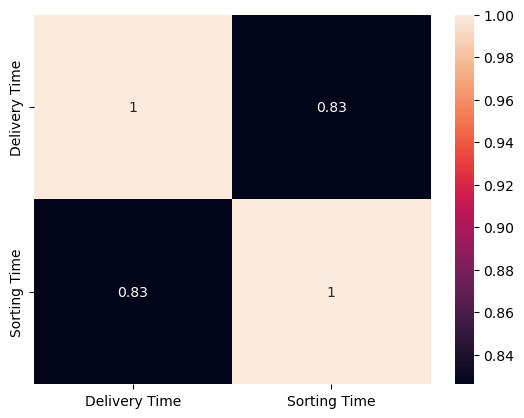

In [23]:
sns.heatmap(data.corr(), annot=True)


In [ ]:
# Inference: We can see that feature and label of our dataset are positively correlated with each other

### Distribution of Dataset

C:\Users\91878\AppData\Local\Temp\ipykernel_3872\3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

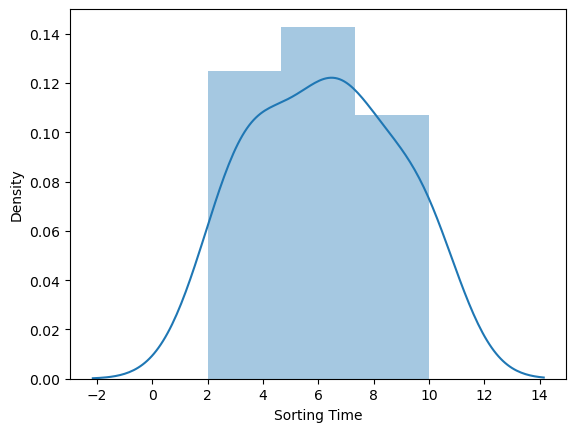

In [30]:
sns.distplot(data['Sorting Time'])

C:\Users\91878\AppData\Local\Temp\ipykernel_3872\2217253749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

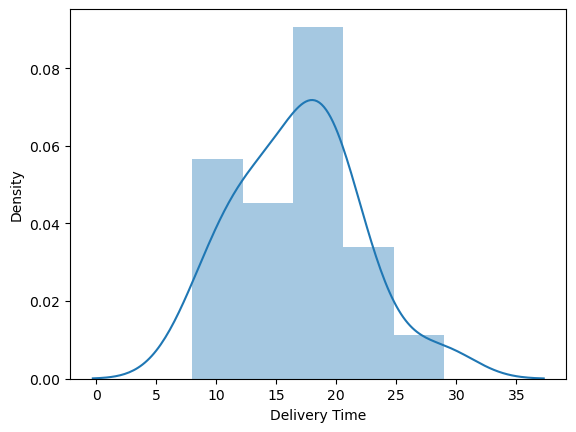

In [29]:
sns.distplot(data['Delivery Time'])

#### Both the data is distributed normally

<Axes: xlabel='Delivery Time'>

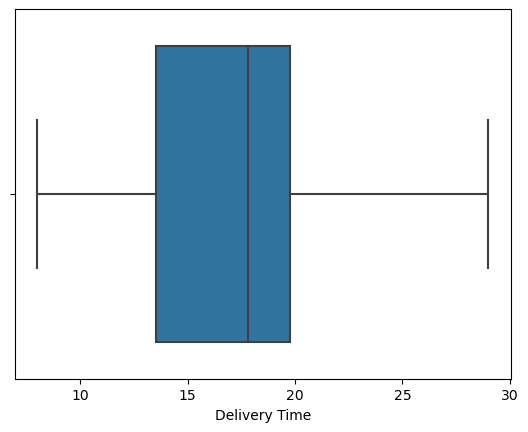

In [38]:
sns.boxplot(x=data['Delivery Time'])

<Axes: xlabel='Sorting Time'>

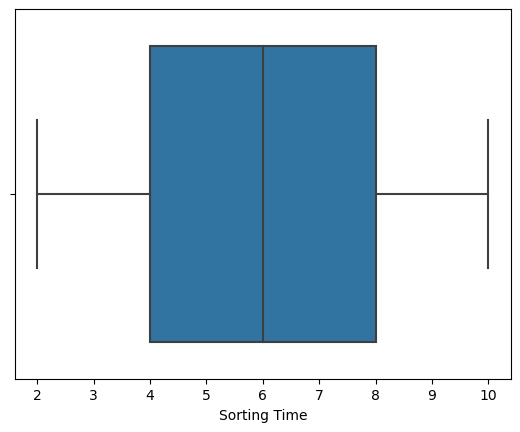

In [40]:
sns.boxplot(x=data['Sorting Time'])

#### No outliers are present here

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

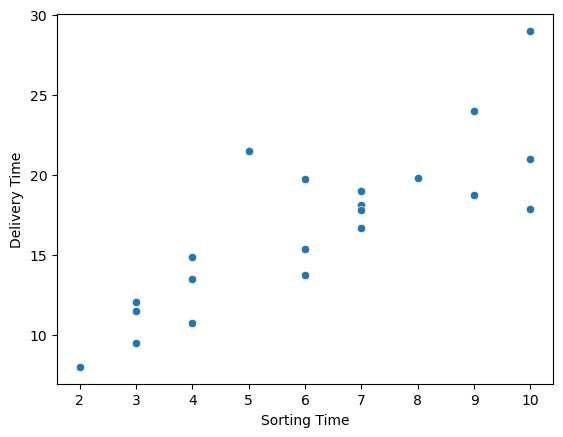

In [41]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=data)

#### It represents a positive correlation between Sorting Time and Delivery Time

## SKLEARN Model for prediction

### Sampling the data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
data.shape

(21, 2)

### Splitting the data

In [46]:
X=data['Sorting Time']
y=data['Delivery Time']

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8)

In [50]:
# Checking training data shape
X_train.shape, y_train.shape 

((16,), (16,))

In [51]:
# Checking testing data  shape
X_test.shape, y_test.shape

((5,), (5,))

In [54]:
# reshaping the data as it is in Simple linear form
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [55]:
model=LinearRegression()

In [56]:
model_fit=model.fit(X_train, y_train)

In [73]:
model_fit.coef_

array([[1.67521873]])

In [74]:
model_fit.intercept_

array([6.25830674])

In [57]:
# now, our data is fitted and trained
model_fit

LinearRegression()

### Making Prediction

In [61]:
X_test=X_test.values.reshape(-1,1)
predict=model_fit.predict(X_test)
predict

array([[17.98483788],
       [16.30961915],
       [12.95918168],
       [17.98483788],
       [14.63440041]])

In [63]:
data_pred=pd.DataFrame(predict,columns=["Predicted_data"])

In [64]:
## putting values of y_test in the Actual_data column in dataframe
data_pred["Actual_data"]=y_test.values

In [69]:
## Comparing the Actual and Predicted Data side by side
data_pred[['Actual_data','Predicted_data']]

,Actual_data,Predicted_data
0,19.00,17.984838
1,15.35,16.309619
2,10.75,12.959182
3,16.68,17.984838
4,21.50,14.634400


In [81]:
from sklearn.metrics import r2_score,  mean_absolute_error, mean_squared_error
from math import sqrt

In [78]:
# Strength of the model
r2_score(data_pred['Actual_data'], data_pred['Predicted_data'])

0.15065443907834697

#### r2_score is low, it shows that model has low strength

In [82]:
# Root Mean Squared Error
sqrt(mean_squared_error(data_pred['Actual_data'], data_pred['Predicted_data']))

3.3367938599623925

#### RMSE showing 3.33679 here means that the model's predictions are approximately 3.33679 units away from the actual observed values.

### Visualizing the training data

Text(0, 0.5, 'Delivery')

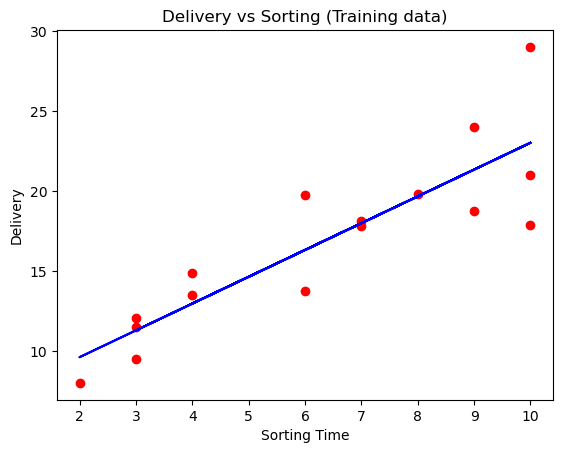

In [90]:
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train,model.predict(X_train), color='blue')
plt.title('Delivery vs Sorting (Training data)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')

### Visualizing the test data

Text(0, 0.5, 'Delivery')

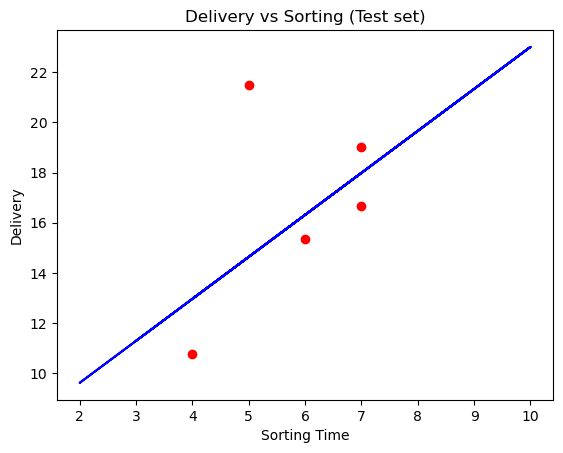

In [89]:
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Delivery vs Sorting (Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
